In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

# Set the default size of the figure and the resolution to display the plots used later in the analysis
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams['figure.dpi'] = 140

# File to Load
netflix_titles_to_load = Path("Resources/cleaned_netflix_df.csv")

# Read file and store into Pandas DataFrame
netflix_data_df = pd.read_csv(netflix_titles_to_load)
netflix_data_df.head()

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
3,7,Movie,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
4,8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV"


In [2]:
# Number of Movies & TV Shows on Netflix (Table)
type_count = netflix_data_df["type"].value_counts()
type_count_df = pd.DataFrame(type_count)
type_count_df

,count
type,
Movie,5690
TV Show,2274


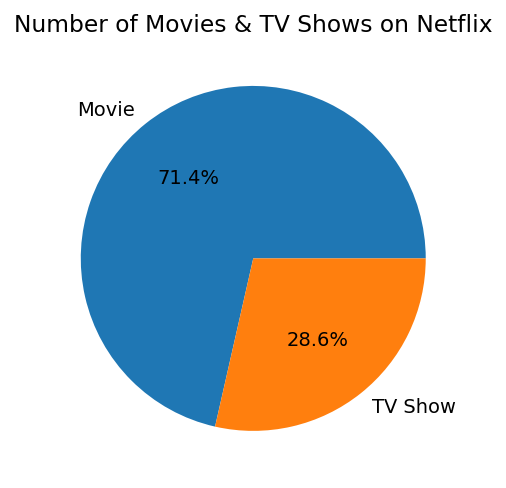

In [3]:
# Number of Movies & TV Shows on Netflix (Pie plot)
plt.pie(type_count_df["count"], labels = type_count_df.index, autopct="%1.1f%%",)
plt.title("Number of Movies & TV Shows on Netflix")

plt.show() 

In [4]:
# Pulling the date_added column and moving it to a Data Frame 
netflix_data_df['date_added'] = pd.to_datetime(netflix_data_df['date_added'], format="%B %d, %Y", errors='coerce')

netflix_data_df['year_added'] = netflix_data_df['date_added'].dt.year
netflix_data_df['month_added'] = netflix_data_df['date_added'].dt.month_name()

release_counts = netflix_data_df.groupby(['year_added', 'month_added']).size().reset_index(name='count')

release_counts.head()

,year_added,month_added,count
0,2008.0,February,1
1,2008.0,January,1
2,2009.0,May,1
3,2009.0,November,1
4,2010.0,November,1


In [5]:
release_year = netflix_data_df.groupby(['type', 'year_added']).size().reset_index(name ='count')
release_year["year_added"] = pd.to_numeric(release_year["year_added"], downcast='integer')

release_year.head()

,type,year_added,count
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3


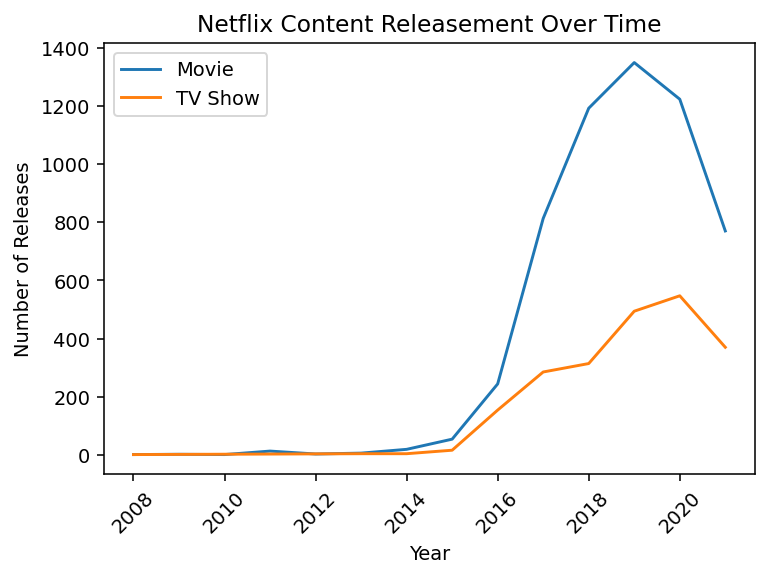

In [6]:
# Create a line chart based on the year vs Movies & TV Shows
movies = release_year.loc[release_year["type"] == 'Movie']
tv_shows = release_year.loc[release_year["type"] == 'TV Show']

plt.plot(movies["year_added"], movies["count"], label = "Movie") 
plt.plot(tv_shows["year_added"], tv_shows["count"], label = "TV Show") 
plt.title('Netflix Content Releasement Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend() 
plt.show()

In [7]:
# Sorting the content added by month
release_month = netflix_data_df.groupby(['type', 'month_added']).size().reset_index(name='count')
release_month = release_month.sort_values(by='month_added', key=lambda x: pd.to_datetime(x, format='%B'))

release_month.head()

,type,month_added,count
4,Movie,January,527
16,TV Show,January,163
3,Movie,February,372
15,TV Show,February,163
7,Movie,March,502


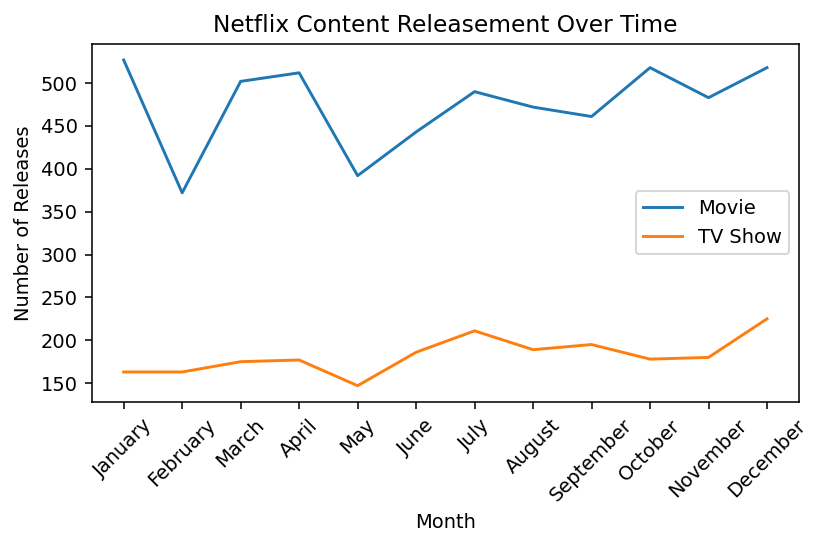

In [8]:
# Create a line chart based on the year vs Movies & TV Shows
movies_mon = release_month.loc[release_month["type"] == 'Movie']
tv_shows_mon = release_month.loc[release_month["type"] == 'TV Show']

plt.plot(movies_mon["month_added"], movies_mon["count"], label = "Movie") 
plt.plot(tv_shows_mon["month_added"], tv_shows_mon["count"], label = "TV Show") 
plt.title('Netflix Content Releasement Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend() 
plt.show()

In [13]:
# Split comma separated values
netflix_df = netflix_data_df.assign(country=netflix_data_df['country'].str.split(', ')).explode('country')

# Some values had , at the end still (for example, "United States," so replace those with nothing
netflix_df["country"] = netflix_df["country"].str.replace(",","")

# Change old country names to standard country names
netflix_df["country"] = netflix_df["country"].replace({"Soviet Union": "Russia"})
netflix_df["country"] = netflix_df["country"].replace({"West Germany": "Germany"})
netflix_df["country"] = netflix_df["country"].replace({"East Germany": "Germany"})

netflix_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in,year_added,month_added
0,0,Movie,United States,2021-09-25,2020,PG-13,Documentaries,2021.0,September
1,1,TV Show,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021.0,September
2,4,TV Show,India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2021.0,September
3,7,Movie,United States,2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021.0,September
3,7,Movie,Ghana,2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021.0,September
...,...,...,...,...,...,...,...,...,...
7959,8801,Movie,Jordan,2016-03-09,2015,TV-MA,"Dramas, International Movies, Thrillers",2016.0,March
7960,8802,Movie,United States,2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers",2019.0,November
7961,8804,Movie,United States,2019-11-01,2009,R,"Comedies, Horror Movies",2019.0,November
7962,8805,Movie,United States,2020-01-11,2006,PG,"Children & Family Movies, Comedies",2020.0,January


In [14]:
# Find type = Movies
movie_type = netflix_df[(netflix_df["type"] == "Movie")]

# Count how many Movies each country has produced
count_movie = movie_type.groupby(["country"])["type"].value_counts().sort_values(ascending=False).reset_index()

# Find type = TV Shows
tv_type = netflix_df[(netflix_df["type"] == "TV Show")]

# Count how many TV Shows each country has produced
count_tv = tv_type.groupby(["country"])["type"].value_counts().sort_values(ascending=False).reset_index()
count_tv

,country,type,count
0,United States,TV Show,932
1,United Kingdom,TV Show,271
2,Japan,TV Show,197
3,South Korea,TV Show,170
4,Canada,TV Show,126
...,...,...,...
60,Croatia,TV Show,1
61,Belarus,TV Show,1
62,Azerbaijan,TV Show,1
63,Austria,TV Show,1


In [15]:
# Merge the two dataframes - movie count and tv count
# rename and remove columns for formatting
netflix_all = pd.merge(count_movie, count_tv, how="outer", on=["country"])
df = netflix_all.rename(columns = {"count_x": "Movies Produced", "count_y": "TV Shows Produced", "country": "Country"}, inplace=True)
netflix_final = netflix_all.drop(columns = {"type_x", "type_y"})

# Replace NaN values with 0, if a country never produced a movie or tv show
netflix_final["Movies Produced"] = netflix_final["Movies Produced"].replace(np.nan, 0)
netflix_final["TV Shows Produced"] = netflix_final["TV Shows Produced"].replace(np.nan, 0)

# Find the Total Produced column by summing Movies + TV shows columns
netflix_final["Total Produced"] = netflix_final["Movies Produced"] + netflix_final["TV Shows Produced"]
netflix_final = netflix_final.sort_values(by=["Total Produced"], ascending=False)

# Display columns as integers only, for formatting
netflix_final["Movies Produced"] = netflix_final["Movies Produced"].astype(int)
netflix_final["TV Shows Produced"] = netflix_final["TV Shows Produced"].astype(int)
netflix_final["Total Produced"] = netflix_final["Total Produced"].astype(int)

# Display DataFrame where country is not equal to "" value, one country had no name but wasn't a NaN value
netflix_final = netflix_final.loc[netflix_final["Country"]!="",:]

netflix_final

,Country,Movies Produced,TV Shows Produced,Total Produced
0,United States,2752,932,3684
1,India,962,84,1046
2,United Kingdom,534,271,805
3,Canada,319,126,445
4,France,303,90,393
...,...,...,...,...
95,Botswana,1,0,1
96,Burkina Faso,1,0,1
97,Cameroon,1,0,1
98,Dominican Republic,1,0,1


In [25]:
# Normalize the data to show a better scale
log = netflix_final.copy()
log["Total Produced (log scale)"] = np.log10(log["Total Produced"])

# Plot the figure
fig = px.choropleth(
    log, 
    color="Total Produced (log scale)", 
    locations="Country", 
    locationmode="country names",
    hover_data=["Total Produced"],
    title="Netflix Library Distribution by Country"
    )

fig.show()

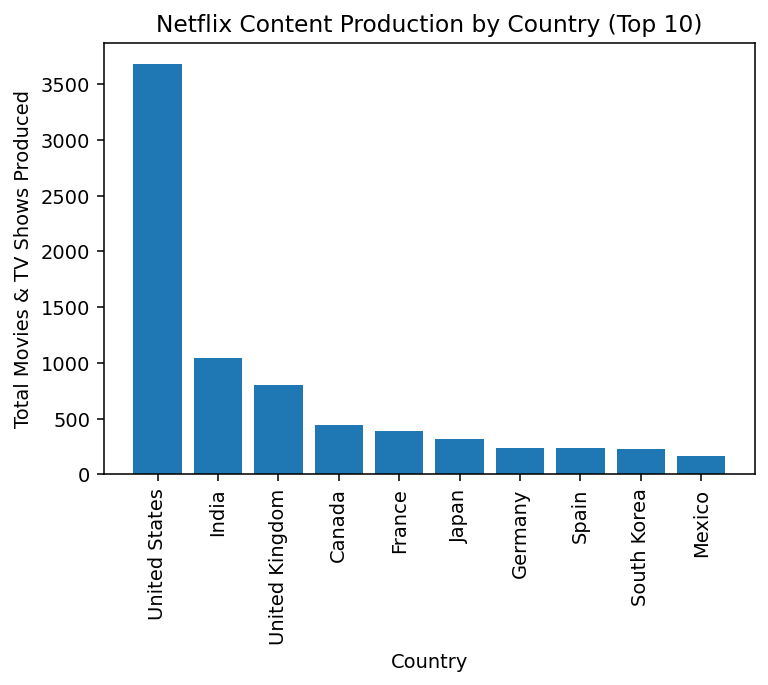

In [24]:
# Top 10 Netflix Libaries by Country (Total Produced) 
# Plotting a bar chart
netflix_slice = netflix_final.head(10)
x_axis = netflix_slice["Country"]
y_axis = netflix_slice["Total Produced"]

# Charting and setting labels
plt.bar(x_axis, y_axis)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation=90)
plt.xlabel("Country")
plt.ylabel("Total Movies & TV Shows Produced")
plt.title("Netflix Content Production by Country (Top 10)")
plt.show()

In [14]:
# Remove leading/trailing spaces from the 'country' column
cleaned_netflix_df = netflix_data_df.copy()
cleaned_netflix_df['country'] = cleaned_netflix_df['country'].str.strip()

#splitting each row where mulitple countries are in one value into multiple rows
cleaned_netflix_df = cleaned_netflix_df.assign(country=cleaned_netflix_df['country'].str.split(',')).explode('country')

#calculating the new country count
new_country_count = cleaned_netflix_df['country'].value_counts()

#finding the top 10 country count
top_10_country_count = new_country_count.head(10)

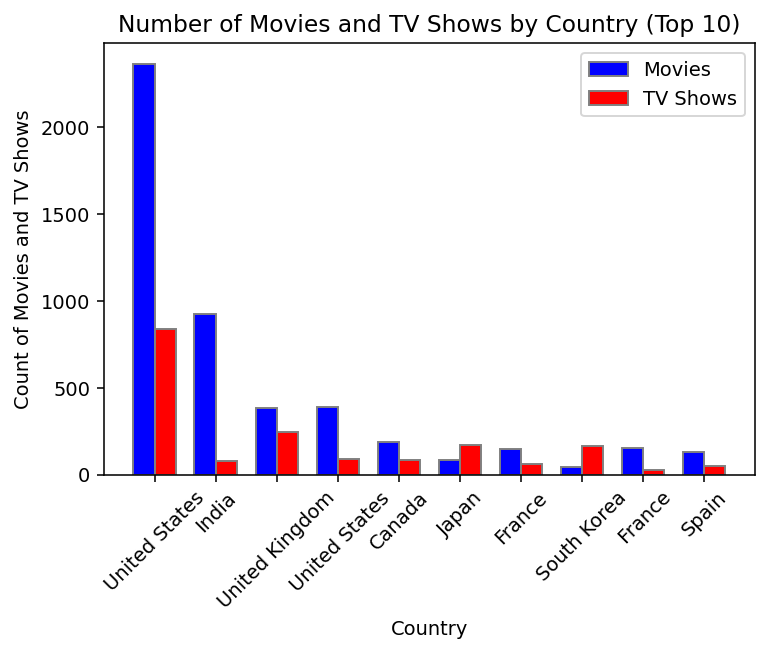

In [15]:
# Grouped the data by Country and Type, then count occurrences
grouped_data = cleaned_netflix_df.groupby(['country', 'type']).size().unstack(fill_value=0)

# Sum the counts of movies and TV shows for each country
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the grouped_data DataFrame by the total count in descending order
sorted_data = grouped_data.sort_values(by='Total', ascending=False)

# Select the top 10 countries
top_10_countries = sorted_data.head(10)

# Plotting
fig, ax = plt.subplots()

# Define the width of each bar
bar_width = 0.35

# Set the position of the bars on the x-axis
movies = range(len(top_10_countries.index))
tv_shows = [x + bar_width for x in movies]

# Plot bars for movies
ax.bar(movies, top_10_countries['Movie'], color='b', width=bar_width, edgecolor='grey', label='Movies')
# Plot bars for TV shows
ax.bar(tv_shows, top_10_countries['TV Show'], color='r', width=bar_width, edgecolor='grey', label='TV Shows')

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Count of Movies and TV Shows')
ax.set_xticks([bar + bar_width/2 for bar in range(len(top_10_countries.index))])
ax.set_xticklabels(top_10_countries.index)
ax.legend()

# Show plot
plt.title('Number of Movies and TV Shows by Country (Top 10)')
plt.xticks(rotation=45)
plt.show()

In [16]:
#finding the unique ratings 
ratings_type = netflix_data_df['rating'].unique()

#removing the values in the ratings column that are not ratings
ratings_cleaned_df = cleaned_netflix_df.loc[(cleaned_netflix_df['rating']!= '74 min') &
                                           (cleaned_netflix_df['rating']!= '84 min')&
                                           (cleaned_netflix_df['rating']!='66 min')]
ratings_cleaned_df.head()

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in,year_added,month_added
0,0,Movie,United States,2021-09-25,2020,PG-13,Documentaries,2021.0,September
1,1,TV Show,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021.0,September
2,4,TV Show,India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2021.0,September
3,7,Movie,United States,2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021.0,September
3,7,Movie,Ghana,2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021.0,September


In [17]:
#checking the ratings in the dataframe after removing the duration
cleaned_ratings_type = ratings_cleaned_df['rating'].unique()

#removing 'UR' and 'NR' values from the dataframe because it means the film was not rated for some reason
# UR and NR is removed for analysis because it does not help with analyzing the average age for movies or TV shows
remove_unrated_df = ratings_cleaned_df.loc[(ratings_cleaned_df['rating']!='UR')&
                                          (ratings_cleaned_df['rating']!='NR')]
remove_unrated_df.head()

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in,year_added,month_added
0,0,Movie,United States,2021-09-25,2020,PG-13,Documentaries,2021.0,September
1,1,TV Show,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021.0,September
2,4,TV Show,India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2021.0,September
3,7,Movie,United States,2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021.0,September
3,7,Movie,Ghana,2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021.0,September


In [18]:
#checking values to see if the dataframe if removed the unrated films 
values_without_unrated = remove_unrated_df['rating'].unique()

#creating the movie dataframe
movies_df = remove_unrated_df.loc[remove_unrated_df['type']=='Movie']

#checking the unique ratings
movie_types = movies_df['rating'].unique()

#removing TV ratings from movies type
movies_df = movies_df.loc[(movies_df['rating']!='TV-MA')&
                         (movies_df['rating']!='TV-14')&
                         (movies_df['rating']!='TV-PG')&
                         (movies_df['rating']!='TV-Y7')&
                         (movies_df['rating']!='TV-G')&
                         (movies_df['rating']!='TV-Y')&
                         (movies_df['rating']!='TV-Y7-FV')]

movies_df.head()

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in,year_added,month_added
0,0,Movie,United States,2021-09-25,2020,PG-13,Documentaries,2021.0,September
5,9,Movie,United States,2021-09-24,2021,PG-13,"Comedies, Dramas",2021.0,September
12,27,Movie,United States,2021-09-20,2010,PG-13,Comedies,2021.0,September
13,28,Movie,United States,2021-09-19,2013,PG-13,"Horror Movies, Sci-Fi & Fantasy",2021.0,September
14,29,Movie,United States,2021-09-19,2013,PG-13,Thrillers,2021.0,September


In [19]:
#verifying that the movie dataframe only contains movie ratings
new_movies_type = movies_df['rating'].unique()

#createing the dataframe for the TV show
tv_shows_df = remove_unrated_df.loc[remove_unrated_df['type']=='TV Show']

#checking the unique tv ratings
tv_show_types = tv_shows_df['rating'].unique()

#removing movie ratings from tv-shows
tv_shows_df= tv_shows_df.loc[(tv_shows_df['rating']!='R')]

#verifying that tv show dataframe only has tv ratings
new_tv_shows_types=tv_shows_df['rating'].unique()

In [20]:
#importing the datetime dependency
from datetime import datetime
#finding the current date time
current_year = datetime.now().year
#adding new column for age for all tv shows based of release year and current year
tv_shows_df.loc[:,'age']= current_year - tv_shows_df['release_year']

tv_shows_df.head()

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in,year_added,month_added,age
1,1,TV Show,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021.0,September,3
2,4,TV Show,India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2021.0,September,3
4,8,TV Show,United Kingdom,2021-09-24,2021,TV-14,"British TV Shows, Reality TV",2021.0,September,3
7,15,TV Show,United States,2021-09-22,2021,TV-MA,"TV Comedies, TV Dramas",2021.0,September,3
8,17,TV Show,Mexico,2021-09-22,2020,TV-MA,"Crime TV Shows, Spanish-Language TV Shows, TV ...",2021.0,September,4


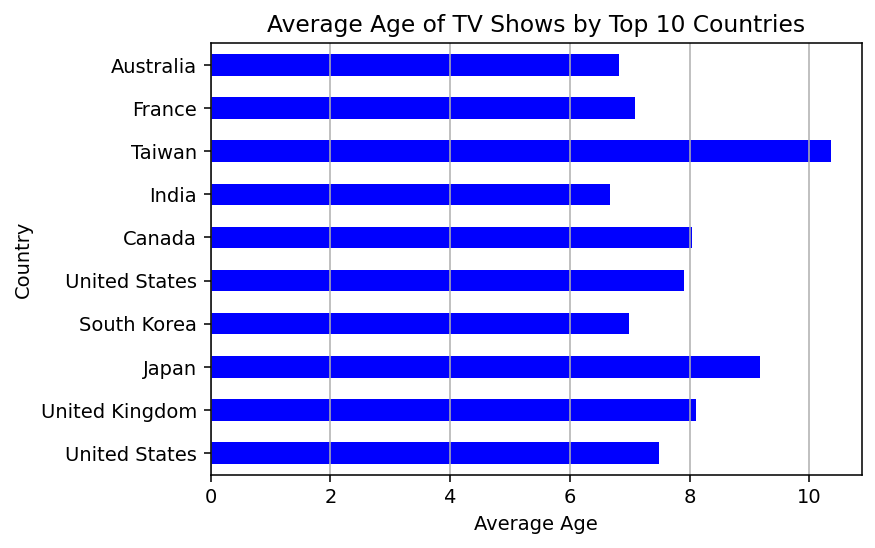

In [21]:
# Calculate count of TV shows for each country
country_counts = tv_shows_df['country'].value_counts()

# Select top 10 countries by count
top_10_countries = country_counts.head(10).index

# Calculate average age of TV shows for each of the top 10 countries
average_age_by_country = tv_shows_df.groupby('country')['age'].mean().loc[top_10_countries]

# Plot the horizontal broken bar graph
plt.figure()
average_age_by_country.plot(kind='barh', color='blue')
plt.xlabel('Average Age')
plt.ylabel('Country')
plt.title('Average Age of TV Shows by Top 10 Countries')
plt.grid(axis='x')
plt.show()

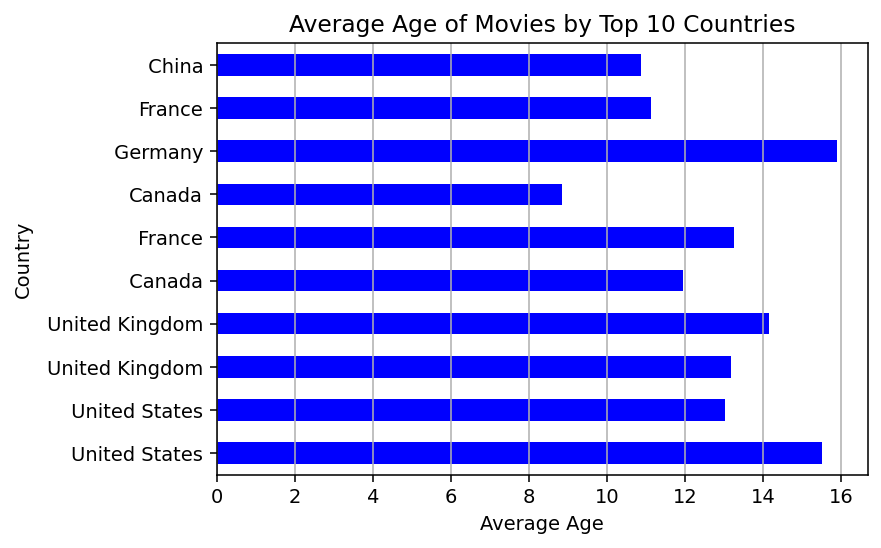

In [22]:
#creating a variable for the current year
current_year = datetime.now().year
#calculating the age of each movie
movies_df.loc[:,'age']= current_year - movies_df['release_year']

# Calculate count of movies for each country
country_counts = movies_df['country'].value_counts()

# Select top 10 countries by count
top_10_countries = country_counts.head(10).index

# Calculate average age of movies for each of the top 10 countries
average_age_by_country = movies_df.groupby('country')['age'].mean().loc[top_10_countries]

# Plot the horizontal broken bar graph
plt.figure()
average_age_by_country.plot(kind='barh', color='blue')
plt.xlabel('Average Age')
plt.ylabel('Country')
plt.title('Average Age of Movies by Top 10 Countries')
plt.grid(axis='x')
plt.show()

In [23]:
# Drop the unwanted column in the dataframe
netflix_ratings_df = netflix_data_df.drop(columns = netflix_data_df.columns[0], inplace = False)

# Rename columns in the above dataframe for consistency
netflix_ratings_df = netflix_ratings_df.rename(
    columns={
        'type':'Media Type', 
        'country':'Country', 
        'date_added':'Date_Added', 
        'release_year':'Year_of_Release', 
        'rating':'Rating', 
        'listed_in':'Media_Category'}
)

# Remove rows that have minimal to no entries for ratings that cannot be mapped to specific target ages
ratings_filter_list = ['66 min', '74 min', '84 min']
netflix_ratings_df = netflix_ratings_df.drop(netflix_ratings_df[netflix_ratings_df['Rating'].isin(ratings_filter_list)].index)

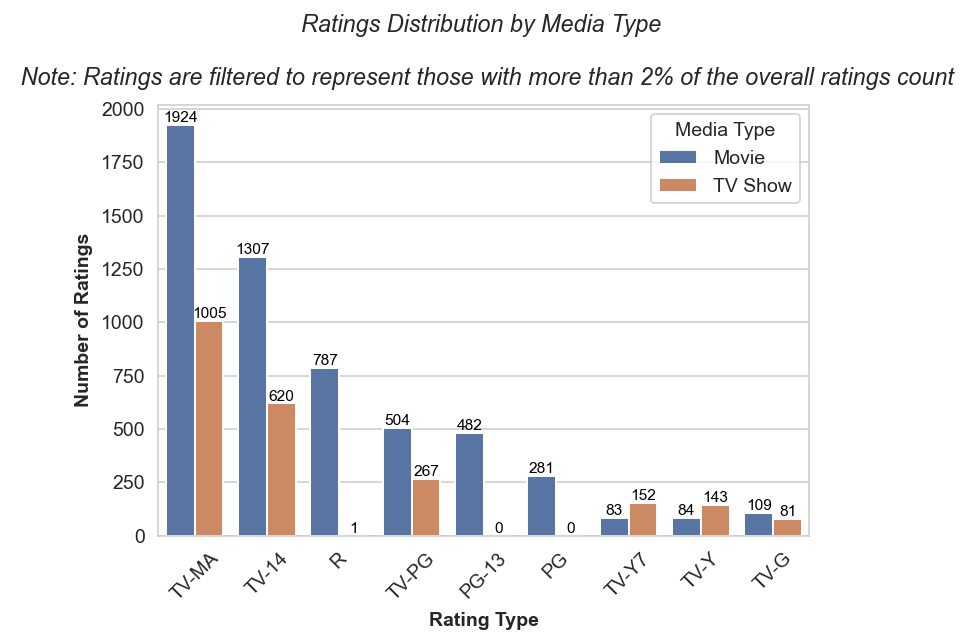

In [24]:
# Customize plotting attributes for Seaborn:
palette_color = sns.color_palette("deep")
sns.set_style("whitegrid")
color_map = plt.colormaps['RdBu']

# Generate a count plot showing the total number of ratings for each media type (Movie/TV Show) using Pandas.

# Step 1: Filter the dataset to only include media types that have more than 2% of the total ratings volume
ratings_count = netflix_ratings_df['Rating'].value_counts(ascending = False)
ratings_count_filtered = ratings_count[ratings_count / ratings_count.sum() > 0.02]

# Step 2: Display the result in a count plot in DESC order based on the requirement and apply axis formating
ax = sns.countplot(
    x = 'Rating', hue = 'Media Type', 
    data = netflix_ratings_df, 
    order = ratings_count.iloc[0:len(ratings_count_filtered)].index, 
    palette = palette_color
)

plt.title(
    'Ratings Distribution by Media Type \n\n Note: Ratings are filtered to represent those with more than 2% of the overall ratings count', 
    fontstyle = 'italic', 
    size = 12, 
    pad = 10
)
plt.xlabel('Rating Type', fontweight = 'bold', size=10)
plt.ylabel('Number of Ratings', fontweight = 'bold', size=10)
plt.xticks(rotation = 45)

# Step 4: Annotate the bar labels to show the respective bar labels
# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_text = round(bar.get_height())
  # This will give the middle of each bar on the x-axis.
  text_label_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_label_y = bar.get_y() + bar_text
  # Label each of the bars
  ax.text(text_label_x, text_label_y, bar_text, ha = 'center', va = 'bottom', color = 'k', size = 8)

# Step 3: Display the plot
plt.show()

In [25]:
# Data Preparation and wrangling for plotting the heatmap showing target population preferences

# Step 1: Let's retrieve just the first country for media types that have multiple country affiliations
netflix_ratings_df['First_Country'] = netflix_ratings_df['Country'].apply(lambda x: x.split(",")[0])

# Step 2: Create a dictionary to map the target ages of the audience against the media ratings
ratings_ages = {
            'TV-PG': 'Older Kids',
            'TV-MA': 'Adults',
            'TV-Y7-FV': 'Older Kids',
            'TV-Y7': 'Older Kids',
            'TV-14': 'Teens',
            'R': 'Adults',
            'TV-Y': 'Kids',
            'NR': 'Adults',
            'PG-13': 'Teens',
            'TV-G': 'Kids',
            'PG': 'Older Kids',
            'G': 'Kids',
            'UR': 'Adults',
            'NC-17': 'Adults'
              }

# Step 3: Replace the existing Rating column in the input dataframe with the above mapped series
netflix_ratings_df['Target_Ages'] = netflix_ratings_df['Rating'].replace(ratings_ages)

In [26]:
# Pre-processing steps to identify the specific attributes for a target audience distribution across countries

# Step 1: Initialize country level counter for processing
netflix_ratings_df['Country_Count'] = 1

# Step 2: Create a series for the Top 10 countries in terms of the media releases
country_data = netflix_ratings_df.groupby('First_Country')['Country_Count'].sum().sort_values(ascending=False).reset_index()[0:10]
country_data = country_data['First_Country']

# Step 3: Create a new dataframe for the heatmap
target_audience_heatmap = netflix_ratings_df.loc[netflix_ratings_df['First_Country'].isin(country_data)]

# Step 4: Use the Python 'Crosstab' function to normalize the distribution of media assets across Top 10 countries
target_audience_heatmap = pd.crosstab(target_audience_heatmap['First_Country'], target_audience_heatmap['Target_Ages'], normalize = "index").T

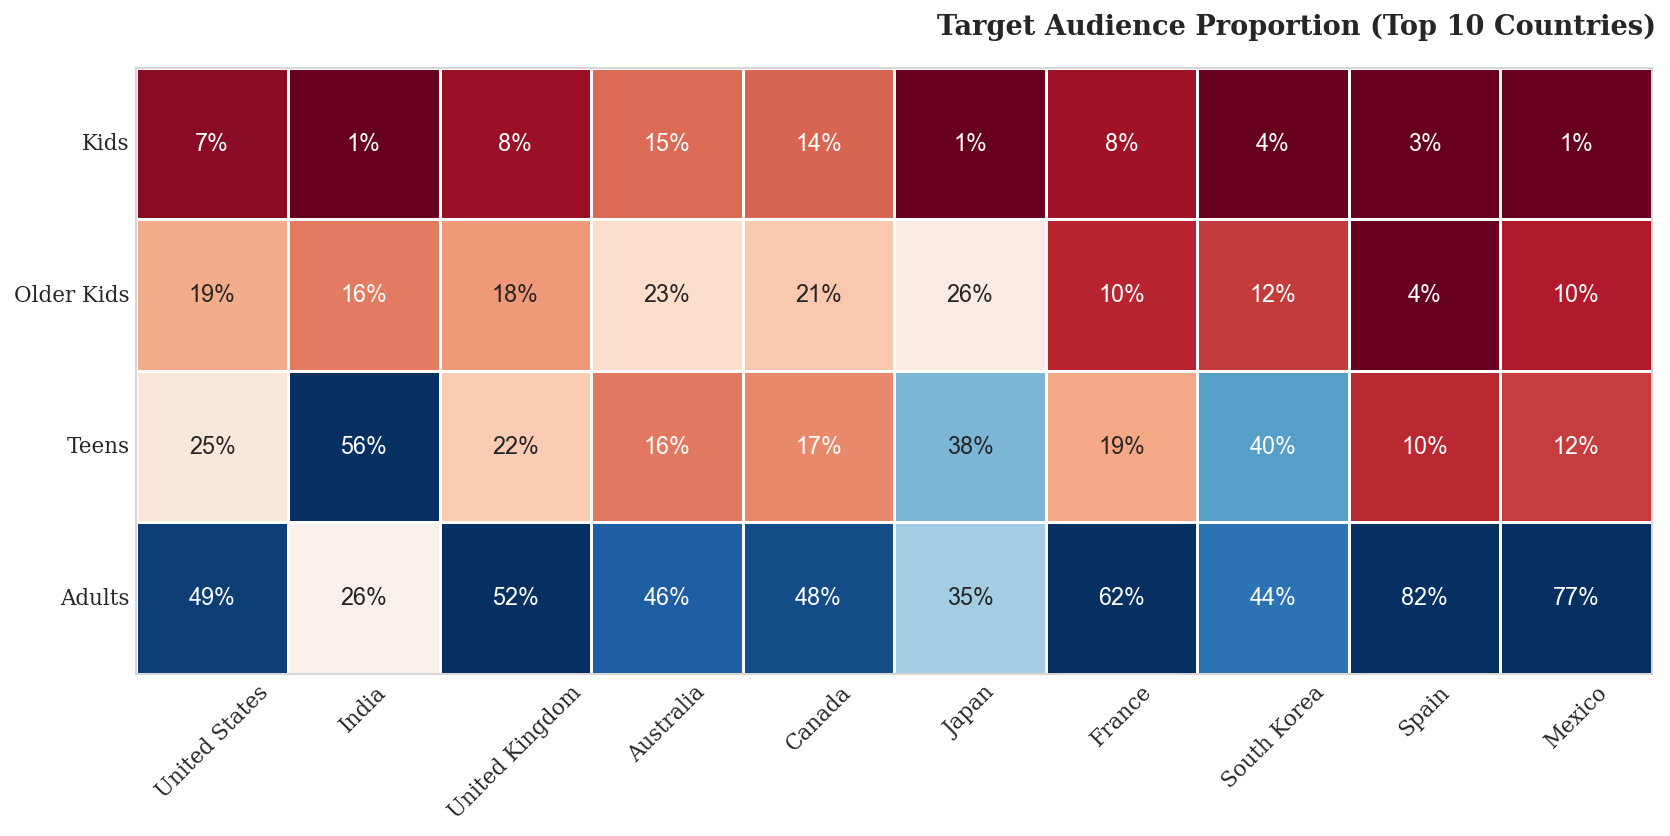

In [27]:
# Generate the actual heatmap based on the prior calculations and pre-processing steps for the datase

# Step 1: Create the target lists for each of the axes for the heatmaps for plotting
target_country_list = ['United States', 'India', 'United Kingdom', 'Australia', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
target_age_list = ['Kids','Older Kids','Teens','Adults']

# Step 2: Plot the heatmap based on the above lists and additional custom attributes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(
    target_audience_heatmap.loc[target_age_list, target_country_list], 
    cmap = color_map, 
    square = True, 
    linewidth = 1.5, 
    cbar = False, 
    annot = True, 
    fmt = '1.0%', 
    vmax = 0.5 , 
    vmin = 0.05, 
    ax = ax, 
    annot_kws={"fontsize":12}
)

# Step 3: Apply additional customization to the heatmap
ax.spines[:].set_visible(True)
fig.text(0.99, 0.70, 'Target Audience Proportion (Top 10 Countries)', fontweight = 'bold', fontfamily = 'serif', fontsize = 14, ha ='right')
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 45, fontsize=11)
ax.set_ylabel(''); ax.set_xlabel('')
ax.tick_params(axis = 'both', which = 'both', length = 0)
plt.tight_layout()

# Step 4: Display the heatmap
plt.show()